<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape
# Answer: (979, 6)

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes
# Answer: star_rating - float64, title - object, content_rating - object, genre - object, duration - int64, actors_list - object

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
sum(movies.duration)/len(movies.duration)
# Answer:120.97957099080695

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
movies.sort_values(by=['duration']).head(1)['title']
# Answer:shortest: Freaks

389    Freaks
Name: title, dtype: object

In [7]:
movies.sort_values(by='duration', ascending=False).head(1)['title']
#answer: longest title - Hamlet

476    Hamlet
Name: title, dtype: object

#### Create a histogram of duration, choosing an "appropriate" number of bins.

C:\Users\sharm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


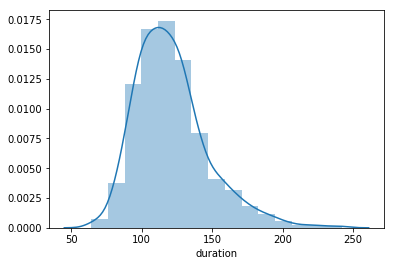

In [8]:
import seaborn as sns
sns.distplot(movies['duration'], bins=15)
# Answer:15

#### Use a box plot to display that same data.

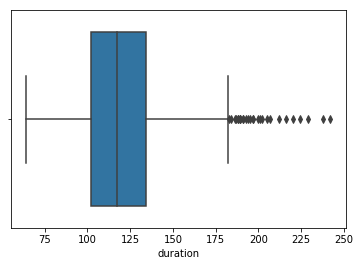

In [9]:
sns.boxplot(movies['duration'])
# Answer:

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
movies.groupby('content_rating').size()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

In [11]:
moviesByRating = pd.DataFrame(movies.groupby('content_rating').size()).reset_index().rename(columns={0:'Size', 'content_rating':"Rating"})
moviesByRating

,Rating,Size
0,APPROVED,47
1,G,32
2,GP,3
3,NC-17,7
4,NOT RATED,65
5,PASSED,7
6,PG,123
7,PG-13,189
8,R,460
9,TV-MA,1


Text(0.5,1,'Number of Movies by Rating')

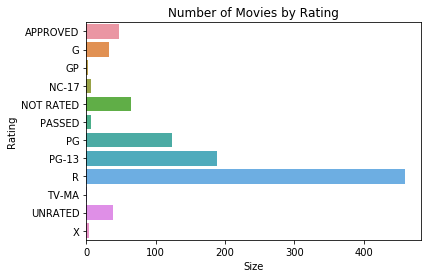

In [12]:
sns.barplot(y='Rating',
            x='Size',
            data=moviesByRating).set_title('Number of Movies by Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

In [14]:
movies.groupby(by='content_rating').size()

content_rating
G           32
NC-17        7
PG         123
PG-13      189
R          460
TV-MA        1
UNRATED    160
X            4
dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [15]:
movies.content_rating.replace(['X','TV-MA'], 'NC-17', inplace=True)

In [16]:
movies.groupby(by='content_rating').size()

content_rating
G           32
NC-17       12
PG         123
PG-13      189
R          460
UNRATED    160
dtype: int64

#### Count the number of missing values in each column.

In [17]:
pd.isna(movies).sum()
# Answer:

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [18]:
movies.fillna('UNRATED',inplace=True)
# Answer:

In [19]:
pd.isna(movies).sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [20]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

In [21]:
movies[movies.duration > 199].star_rating.mean()

8.258333333333333

#### Use a visualization to detect whether there is a relationship between duration and star rating.

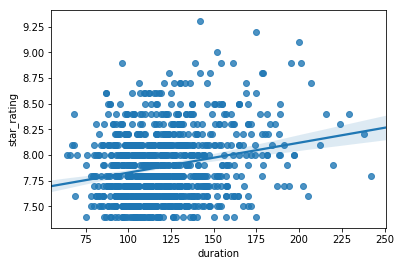

In [22]:
ax = sns.regplot(x = 'duration', y = 'star_rating', data = movies)
# Answer:

#### Calculate the average duration for each genre.

In [23]:
genre = list(movies.genre.unique())
for i in genre:
    print(i, movies[movies.genre == i].duration.mean())
# Answer:

Crime 122.29838709677419
Action 126.48529411764706
Drama 126.53956834532374
Western 136.66666666666666
Adventure 134.84
Biography 131.84415584415584
Comedy 107.6025641025641
Animation 96.59677419354838
Mystery 115.625
Horror 102.51724137931035
Film-Noir 97.33333333333333
Sci-Fi 109.0
History 66.0
Thriller 114.2
Family 107.5
Fantasy 112.0


## Advanced level

#### Visualize the relationship between content rating and duration.

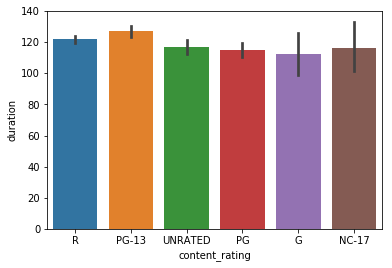

In [24]:
sns.barplot(x='content_rating', y='duration', data=movies)
# Answer:

#### Determine the top rated movie (by star rating) for each genre.

In [33]:
movies.sort_values(by = 'star_rating', ascending = False).groupby(by='genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [36]:
dupeTitle = movies[movies.title.duplicated()].title
dupeTitle

703                            Dracula
678                     Les Miserables
662                          True Grit
466    The Girl with the Dragon Tattoo
Name: title, dtype: object

In [37]:
movies[movies.title.isin(dupeTitle)]

,star_rating,title,content_rating,genre,duration,actors_list
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [48]:
genre10 = movies.groupby(by='genre').star_rating.count()> 9
genre10

# Answer:

genre
Action        True
Adventure     True
Animation     True
Biography     True
Comedy        True
Crime         True
Drama         True
Family       False
Fantasy      False
Film-Noir    False
History      False
Horror        True
Mystery       True
Sci-Fi       False
Thriller     False
Western      False
Name: star_rating, dtype: bool

In [49]:
genre10 = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror', 'Mystery']
movies[movies.genre.isin(genre10)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [52]:
count = movies.genre.value_counts()
genre10 = count[count >= 10].index
movies[movies.genre.isin(genre10)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [58]:
sameActor = movies[movies.actors_list.duplicated()].title

In [59]:
sameActor

891            Harry Potter and the Half-Blood Prince
727               Harry Potter and the Goblet of Fire
642      Harry Potter and the Deathly Hallows: Part 1
551          Harry Potter and the Prisoner of Azkaban
359               The Hobbit: The Desolation of Smaug
222      Harry Potter and the Deathly Hallows: Part 2
81                                        Toy Story 3
54                                 Back to the Future
19                                          Star Wars
12     Star Wars: Episode V - The Empire Strikes Back
Name: title, dtype: object